# Telco Customer Churn Dataset

# 1: Introduction

Context
<br>"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 

Content
<br>Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:
<br> 1.Customers who left within the last month – the column is called Churn
<br> 2.Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
<br> 3.Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
<br> 4.Demographic info about customers – gender, age range, and if they have partners and dependents

# 2: Data preprocessing

## 2.1 Downloading the Dataset from Kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hargurjeet","key":"c3882bdbb49388021171402c7018655e"}'}

In [ ]:
! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/blastchar/telco-customer-churn'
od.download('https://www.kaggle.com/blastchar/telco-customer-churn')

100%|██████████| 172k/172k [00:00<00:00, 34.7MB/s]

## 2.2 Reading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2.3 Cleaning the dataset

In [ ]:
# Removing the unwanted columns
df.drop('customerID', axis = 1, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# converting the TotalCharges to float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce', downcast='float')

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [ ]:
pd.notna(df.TotalCharges)

0       True
1       True
2       True
3       True
4       True
        ... 
7038    True
7039    True
7040    True
7041    True
7042    True
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# These are the rows having TotalCharges as null
df[pd.notna(df.TotalCharges)==False]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df[pd.notna(df.TotalCharges)==False].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
# Dropping these records
df.drop(df[pd.notna(df.TotalCharges)==False].index, inplace =True)

In [ ]:
df.shape

(7032, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


## 2.4 Processing the column values

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for columns in df.columns:
  print(f'{columns}: {pd.unique(df[columns])}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [ ]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [ ]:
for columns in df.columns:
  print(f'{columns}: {pd.unique(df[columns])}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


In [ ]:
object_columns = df.loc[:, df.dtypes==object].columns

In [ ]:
for col in object_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for columns in df.columns:
  print(f'{columns}: {pd.unique(df[columns])}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3226,0,0,0,0,7,1,0,0,0,0,0,0,0,0,20.75,141.100006,0,1,0,0,1,0,0,0,0,0,1
2767,1,0,0,1,46,1,1,0,0,1,1,0,0,1,84.80,3958.850098,0,0,0,1,1,0,0,1,0,0,0
1105,1,0,1,0,9,1,0,0,0,0,0,0,1,1,79.75,769.099976,0,0,0,1,1,0,0,0,0,1,0
83,1,0,0,0,42,1,0,0,1,1,1,1,1,1,103.80,4327.500000,0,0,0,1,1,0,0,1,0,0,0
3333,0,0,0,1,12,1,0,0,0,0,0,0,0,0,19.35,212.300003,0,1,0,0,0,0,1,1,0,0,0


In [ ]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float32
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [ ]:
df1[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.850000
1,34,56.95,1889.500000
2,2,53.85,108.150002
3,45,42.30,1840.750000
4,2,70.70,151.649994


## 2.5 Normalizing the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

df1[['tenure','MonthlyCharges','TotalCharges']] = std_scaler.fit_transform(df1[['tenure','MonthlyCharges','TotalCharges']])
df1[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7038,-0.343137,0.664868,-0.129180
7039,1.612573,1.276493,2.241056
7040,-0.872808,-1.170004,-0.854514
7041,-1.158016,0.319168,-0.872095


In [ ]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5393,1,0,0,0,-1.280248,1,0,0,0,0,0,0,0,1,0.192854,-0.976216,1,0,0,1,1,0,0,0,0,1,0
6793,0,0,1,1,1.612573,1,1,1,1,1,0,1,1,1,1.449343,2.419450,0,0,0,1,0,0,1,0,1,0,0
4125,0,0,1,0,0.430998,1,0,1,1,1,0,0,0,1,0.708081,0.559580,0,0,0,1,1,0,0,0,1,0,0
3804,0,0,0,0,-0.913552,1,1,0,1,0,0,0,0,0,0.500328,-0.655627,0,0,0,1,1,0,0,0,0,1,0
3336,1,0,1,1,0.919926,1,0,0,0,0,0,0,0,0,-1.479140,-0.531300,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
for columns in df1.columns:
  print(f'{columns}: {pd.unique(df1[columns])}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [-1.28024804  0.06430269 -1.23950408  0.51248626 -0.99504031 -0.42462485
 -0.91355239 -0.18016108  1.2051336  -0.7913205  -0.66908862  1.04215776
  0.6754621  -0.30239297  1.49034133  0.79769399  1.57182925 -0.46536881
 -0.83206446 -0.09867316  0.59397418  1.61257321 -0.62834466 -0.22090504
 -1.11727219  0.55323022 -0.87280842  1.53108529  1.24587756  0.43099834
 -0.70983258  1.12364568 -0.5876007   1.36810945 -0.95429635 -1.19876011
 -0.0579292   0.71620607  1.28662152  0.96066983 -1.03578427  0.39025438
  0.10504665  0.63471814 -0.13941712  1.32736548  0.22727853  1.44959737
 -0.01718524  0.91992587  0.18653457  0.14579061  0.34951041 -1.07652823
 -1.15801615  0.02355872  1.40885341 -0.38388089  1.00141379  1.16438964
 -0.75057654 -0.50611277  0.83843795  0.30876645  1.08290172 -0.34313693
  0.4717423  -0.54685673  0.87918191  0.75695003 -0.26164901  0.26802249]
PhoneService: [0 1]
MultipleLines: [0 1]
Online

In [ ]:
X = df1.drop('Churn', axis = 1, inplace=False)
y = df1.Churn

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5625, 26) (1407, 26) (5625,) (1407,)


# 3: Building an ANN network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(26,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.6481 - accuracy: 0.6597
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7877
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8035
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8061
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8009
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8031
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.7984
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8065
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4019 - accura

## 3.1 Evaluation

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 867us/step - loss: 0.4497 - accuracy: 0.7868


[0.44968217611312866, 0.7867803573608398]

## 3.2 Prediction of the trained model

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.01928231],
       [0.06140578],
       [0.7297491 ],
       [0.04457125],
       [0.23115075]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

## 3.3 Classification report

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

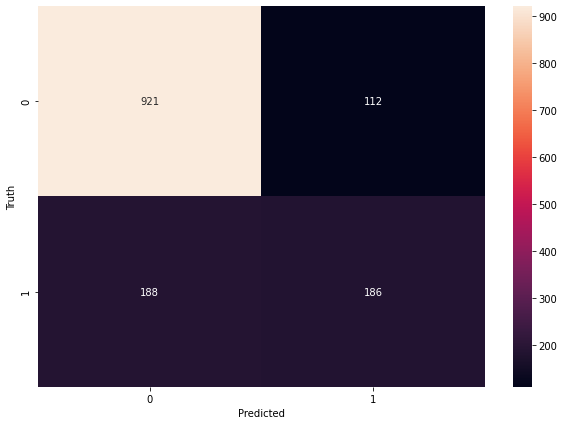

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')